# Lecture 20
- Introduction to Vectors & Vector Operations
- Introduction to Matrices
- Correlations
- Linear Regression

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Last Lecture

- Introduction to vectors
- Vector addition
- Vector scaling

<div class="alert alert-info">
  <strong>Dimension</strong>
    
The **dimension** (or **size**) of a vector is the number of elements it contains.
</div>

## Special vectors

**<font color="blue">Zero Vectors</font>** A *zero vector* is a vector with all elements equal to zero. We will denote the $n$-dimensional zero vector by $\mathbf{0}_n$.

$~~~~~$ For example, 
\begin{align}
\mathbf{0}_5 = 
\begin{bmatrix}
0\\0\\0\\0\\ 0
\end{bmatrix}
\end{align}

**<font color="blue">Ones vectors</font>** A *ones vector* is a vector with all elements equal to one. We will denote the $n$-dimensional ones vector by $\mathbf{1}_n$.

**<font color="blue">Standard Unit Vectors</font>** A *standard unit vector* is a vector with all elements equal to zero, except one element which is equal to one. 

For a given dimension $n$, we denote the stanard unit vector with element $i$ equal to 1 by $e_i$. 

For example, the three standard unit vectors of dimension 3 are:

\begin{align}
e_1=
\begin{bmatrix}
1\\ 0\\ 0
\end{bmatrix}, ~~~~~
e_2=
\begin{bmatrix}
0\\ 1\\ 0
\end{bmatrix}, ~~~~~
e_3=
\begin{bmatrix}
0\\ 0\\ 1
\end{bmatrix}
\end{align}

### Properties of Vector Addition

Because vector addition is component-wise scalar addition, it inherits many of its properties from scalar addition.
<div class="alert alert-info">
    
* *Commutative*: $\mathbf{a}+\mathbf{b} = \mathbf{b} + \mathbf{a}$
* *Associative*: $(\mathbf{a}+\mathbf{b}) +\mathbf{c} = \mathbf{a}+(\mathbf{b} +\mathbf{c})$
* *Identity*: The zero-vector is the identity for vector addition: $\mathbf{a} + \mathbf{0}  = \mathbf{a}$
    
</div>

### Properties of Scaling

<div class="alert alert-info">


* *Commutative*: $\alpha \mathbf{x} = \mathbf{x} \alpha$
* *Associative*: If $\alpha$ and $\beta$ are scalars, then $(\alpha  \beta) \mathbf{x} = \alpha (\beta \mathbf{x})$
* *Distributive over scalar addition*: $(\alpha+\beta) \mathbf{x} = \alpha \mathbf{x} + \beta \mathbf{x}$ and $\mathbf{x} (\alpha+\beta)  = \mathbf{x}\alpha  + \mathbf{x} \beta $ 
* *Distributive over vector addition*: $\alpha ( \mathbf{x} +\mathbf{y}) = \alpha \mathbf{x} + \alpha \mathbf{y}$

</div>

# Today's Lecture

- Inner Product of vectors
- Introduction to Matrices
- Moments of Matrices
- Correlations
- Linear Regression

In [2]:
def plotvec(*argv):
    colors=['b','k','r','g','c','m']
    xmin=0
    xmax=-1000000
    ymin=0
    ymax=-1000000
    origin=[0,0]
    plt.figure()
    for e in enumerate(argv):
        i=e[0]
        arg=e[1]
        plt.quiver(*origin,*arg,angles='xy',scale_units='xy',scale=1,
                   color=colors[i%len(colors)])
        xmin=min(xmin,arg[0])
        xmax=max(xmax,arg[0])
        ymin=min(ymin,arg[1])
        ymax=max(ymax,arg[1])
    plt.xlim(min(-1, xmin-1), max(1,xmax+1))
    plt.ylim(min(-1,ymin-1),max(1,ymax+1))

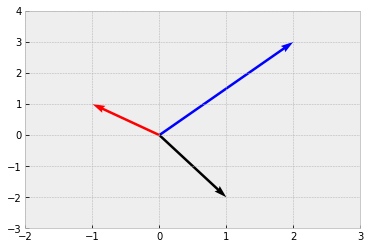

In [5]:
a=[2,3]
b=[1,-2]
c=[-1,1]
plotvec(a,b,c)

## Vector-Vector Multiplication: Inner Product

We also can define multiplication between vectors, but that can be done in different ways. Let's start with the easiest and most common:

<div class="alert alert-info">
  <strong>Inner Product</strong>

The *inner product* or *dot product* between two $n$-vectors $a$ and $b$ is the **scalar value** given by

$$ \mathbf{a} \cdot \mathbf{b} = \mathbf{a}^T \mathbf{b} = a_1 b_1 + a_2 b_2 + \ldots + a_n b_n $$
</div>

I.e., multiplication is carried out elementwise, and then the resulting values are added.

Inner product can also be denoted using other notation, such as $\langle a, b\rangle$ or $(a,b)$.

Write a function to compute the inner product of two vectors. Here is a "Pythonic" way to iterate over the corresponding elements of two vectors:

In [10]:
print('a:',a)
print('b:',b)
print('c:',c)

for x in zip(a,b,c):
    print(x)

a: [2, 3]
b: [1, -2]
c: [-1, 1]
(2, 1, -1)
(3, -2, 1)


In [8]:
?zip

In [14]:
def inner(a,b):
    if len(a) != len(b):
        raise ValueError('The dimensions must be the same!')
        
    total=0
    for x in zip(a,b):
        total += x[0]*x[1]

    return total

Use your function to compute the inner product of $\mathbf{a}$ and $\mathbf{b}$

In [15]:
inner(a,b)

-4

Use your function to compute the inner product of $[-1,2,2]^T$ and $[1,0,-3]^T$

In [16]:
inner([-1,2,2],[1,0,-3])

-7

What happens if we switch the order of the arguments in the inner product?

Use your function to verify:

In [17]:
inner(b,a)

-4

### Properties of Inner Product

<div class="alert alert-info">

* *Commutative*: $\mathbf{a}^T \mathbf{b} = \mathbf{b}^T \mathbf{a}$
* *Associative with scalar multiplication*: $(\gamma \mathbf{a})^T \mathbf{b} = \gamma (\mathbf{a}^T \mathbf{b} )$
* *Distributive across vector addition*: $(\mathbf{a} +\mathbf{b})^T \mathbf{c} = \mathbf{a}^T \mathbf{c} +\mathbf{b}^T \mathbf{c}$
</div>

### Special examples:

**Inner product with Standard Unit Vector**

$\mathbf{e}_i^T \mathbf{a} = a_i$

In [18]:
x = [5,7,9]
e2 = [0,1,0]
inner(x,e2)

7

Computing the inner product with the $i$th standard unit vector returns the $i$th element

**Inner product with 1s vector: Summation**

$\mathbf{1}^T \mathbf{a} = a_1 + a_2 + \ldots + a_n$

In [19]:
ones3 = [1,1,1]
inner(x,ones3)

21

**Averaging** 

$\frac{1}{n} \mathbf{1}^T \mathbf{a} = [1/n, 1/n, \ldots, 1/n]^T \mathbf{a} $

In [20]:
ones3/3

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [21]:
ones3*3

[1, 1, 1, 1, 1, 1, 1, 1, 1]

In [23]:
z3 = np.array(ones3)/3

z3

array([0.33333333, 0.33333333, 0.33333333])

In [24]:
inner(x, z3)

7.0

**Sum of Squares**

$ \mathbf{a}^T\mathbf{a} = a_1^2 + a_2^2 + \cdots + a_n^2$

In [25]:
a=[2,1]

inner(a,a)

5

**Lengths of Vectors**

For vectors $a$ and $b$, what are their lengths?

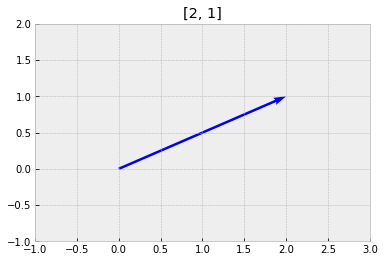

In [30]:
plotvec(a)
plt.title(a);

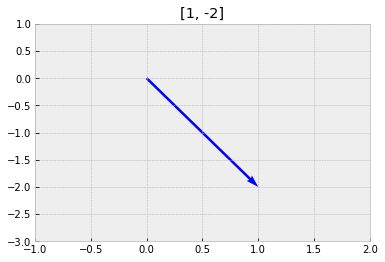

In [29]:
plotvec(b)
plt.title(b);

We denote the length of a vector $\mathbf{a}$ by $\| \mathbf{a}\|$, which is read **norm** of $ \mathbf{a}$. Thus,

$$ \|\mathbf{a}\|^2 = \mathbf{a}^T\mathbf{a} $$

The inner-product of a vector with itself is its norm-squared.

In [36]:
np.sqrt(inner(a,a)) # norm or length

2.23606797749979

In [35]:
np.sqrt(inner(b,b))

2.23606797749979

**Orthogonal vectors**

Consider the two standard unit vectors and their inner product:

In [33]:
e1 = [1,0]
e2 = [0,1]

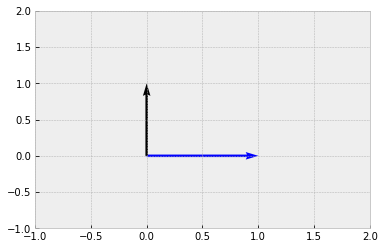

In [34]:
plotvec(e1,e2)

Now consider, $a=[2,1]$ and $b=[-1, 2]$:

In [37]:
inner(a,b)

0

So if the inner product of two vectors is zero, then the vector are perpendicular, that is, they have an 90$^\circ$ angle between them. This is a sufficient and necessary condition, that is:

$$\mathbf{x}^T\mathbf{y} = 0 \iff \mathbf{x} \perp \mathbf{y}$$

### Vector Operations

1. **Vector Summation**: if $\mathbf{c}= \mathbf{a} + \mathbf{b}$, then 

\begin{align*}
c_i = a_i+b_i
\end{align*}

for all $i=1,2,\ldots,n$. 

2. **Scalar-Vector Multiplication** or **scaling**: in scalar-vector multiplcation, a vector is  multiplied by a scalar (a number). This is achieved by multiplying every element of the vector by the scalar: 

\begin{align*}
\alpha [x_1,x_2,\dots,x_n]^T = [\alpha x_1,\alpha x_2,\dots,\alpha x_n]^T
\end{align*}

3. **Vector-Vector Product** or **Inner Product** or **Dot Product**: The *inner product* or *dot product* between two $n$-vectors $a$ and $b$ is the **scalar value** given by 

\begin{align*}
\mathbf{a} \cdot \mathbf{b} = \mathbf{a}^T \mathbf{b} = a_1 b_1 + a_2 b_2 + \ldots + a_n b_n
\end{align*}

4. **Length of Vectors**: we denote the length of a vector $\mathbf{a}$ by $\| \mathbf{a}\|$, which is read **norm** of $ \mathbf{a}$. The norm of a vector is the square-root of the inner product of a vector, that is, 

\begin{align*}
\|\mathbf{a}\| = \sqrt{\mathbf{a}^T\mathbf{a}}
\end{align*}

5. **Orthogonal vectors** or **perpendicular vectors**: if the inner product of two vectors is zero, then the vectors are perpendicular, that is, they have an 90$^\circ$ angle between them. This is a sufficient and necessary condition, that is:

\begin{align*}
\mathbf{x}^T\mathbf{y} = 0 \iff \mathbf{x} \perp \mathbf{y}
\end{align*}

# Vectors in ```NumPy```

We saw how to implement operations like vector addition, scalar-vector multiplication, and vector inner product.

```NumPy``` can do all these operations on vectors:

In [38]:
a=[2,3]
b=[1,-2]

In [39]:
# As a reminder, Python doesn't know you are treating these lists
# as vectors:

a+b

[2, 3, 1, -2]

In [40]:
# Cast these to numpy arrays:
a = np.array(a)

b = np.array(b)

a,b


(array([2, 3]), array([ 1, -2]))

In [41]:
a.shape

(2,)

In [42]:
a2 = a[:,np.newaxis]

In [43]:
a2

array([[2],
       [3]])

In [44]:
a2.shape

(2, 1)

Note that these are row vectors! That is okay for most operations:

In [45]:
#Vector addition

a+b

array([3, 1])

In [46]:
#Scalar multiplication

0.5*a, 2.5*b

(array([1. , 1.5]), array([ 2.5, -5. ]))

In [47]:
#But be careful:

# the following is not the inner product of a with b!

a*b

array([ 2, -6])

**In general, operations assume elementwise operation unless you use special operators.**

There are 2 common ways to do the inner/dot product in numpy:

In [48]:
b2 = b[:,np.newaxis]

a2.shape, b2.shape

((2, 1), (2, 1))

In [49]:
a2.T@b2

array([[-4]])

In [50]:
np.dot(a,b)

-4

In the second approach, the "@" symbol is a general symbol indicating matrix multiplication. Note that the second approach matches the inner product notation favored by Boyd:

$\mathbf{a}^T \mathbf{b} = \mathbf{a} \cdot \mathbf{b}$,

whereas the first approach is the dot product notation usually used in engineering and physics.

### Special Vectors

```NumPy``` knows how to make several special vectors that we discussed in class:

In [55]:
# Zeros vector

np.zeros((5,1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [56]:
# Ones vector

np.ones((5,1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [57]:
np.ones((1,5))

array([[1., 1., 1., 1., 1.]])

In [70]:
# Standard indicator vector with 1 in first place
np.eye(4,1)

array([[1.],
       [0.],
       [0.],
       [0.]])

In [69]:
#Standard indicator vector with 1 in kth place. Ex: k=3

k=2 # e2

np.eye(4,1,1-k)

The latter function arguments are confusing, but we aren't ready to explain them yet!

# A First Glimpse at Matrices: Stacking Vectors Horizontally

In [71]:
a,b

(array([2, 3]), array([ 1, -2]))

In [72]:
a.shape, b.shape

((2,), (2,))

```NumPy``` knows how to stack vectors horizontally:

In [73]:
# CAREFUL: hstack takes a tuple of vectors

np.hstack((a,b))

array([ 2,  3,  1, -2])

In [78]:
np.stack((a,b))

array([[ 2,  3],
       [ 1, -2]])

In [76]:
np.hstack((a.T,b.T))

array([ 2,  3,  1, -2])

What happened? Remember that we made **row** vectors. To make column vectors, we need to enter the values like this:

In [84]:
a2 = a[:,np.newaxis]

b2 = b[:,np.newaxis]

a2.shape, b2.shape

((2, 1), (2, 1))

Turning a ```NumPy``` 1-D vector into a column vector is a little tricky because a 1-D vector only has one axis! We can do it by adding a new axis and then move it 90 degrees:

In [87]:
M = np.hstack((a2,b2))

In [88]:
M

array([[ 2,  1],
       [ 3, -2]])

We call this type of 2-D table a **matrix**. 

## Matrix indexing

We can get the values out of the array by **indexing**. Matrices are indexed like:

**M**[row, column]

In [90]:
# 0, 0 element (1st row, 1st col)

M[0,0]

2

In [91]:
# 1, 0 element: (2nd row, 1st column)

M[1,0]

3

In [92]:
# 1,1 element:
M[1,1]


-2

We can also pull out whole rows or columns by putting ":" for the other index. In particular, to pull out the two vectors:

In [93]:
# First column:

M[:,0]

array([2, 3])

In [94]:
# Second column:

M[:,1]

array([ 1, -2])

In [95]:
# First row:

M[0,:]

array([2, 1])

## General Vectors

Note that vectors do not have to contain only fixed numerical values. 

A vector can consist of variables $\mathbf{x}=[x_1,x_2]^T$. This is very useful to compactly represent linear equations:
$$\left[1,4,-2\right]^T \left[x,y,z\right] = 3$$
is equivalent to 
$$x +4y -2z =3$$

Later, we will see that this notation is even **more** useful when we are representing **systems of linear equations**.

A vector can also have components that are random variables, such as $\mathbf{X}=[X_1, X_2]^T$. In this case, the vector is called a **vector random variable** or **n-dimensional random variable**.

In this lecture we introduce summary statistics for vectors of data and moments for vector random variables.

## Averages and Means, Medians

The average of set of $n$-vectors is vector of the averages of the components:

$\overline{\mathbf{x}} = \left[ \overline{x_1}, \overline{x_2}, \ldots, \overline{x_n} \right]^T$

Let's look at the vector average for the Firearms dataset on Number of State Gun Laws vs Firearms Mortality:

In [96]:
df=pd.read_csv('firearms-combined.csv')

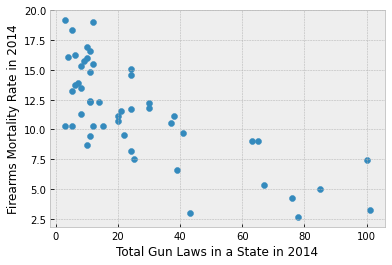

In [97]:
plt.scatter(df['Total Laws 2014'], df['RATE-2014'])
plt.xlabel('Total Gun Laws in a State in 2014')
plt.ylabel('Firearms Mortality Rate in 2014');

In [99]:
x = df[['Total Laws 2014', 'RATE-2014']].to_numpy()

x.shape

(50, 2)

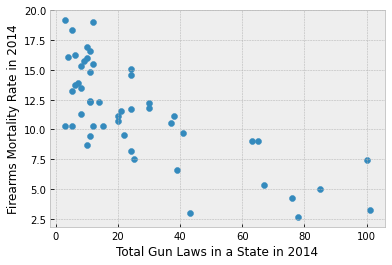

In [100]:
plt.scatter(x[:,0],x[:,1])
plt.xlabel('Total Gun Laws in a State in 2014')
plt.ylabel('Firearms Mortality Rate in 2014');

So, we see that $\mathbf{x}$ has our data. But what is $\mathbf{x}$ like?

In [101]:
x

array([[ 10. ,  16.9],
       [  3. ,  19.2],
       [  8. ,  13.5],
       [ 11. ,  16.6],
       [100. ,   7.4],
       [ 30. ,  12.2],
       [ 85. ,   5. ],
       [ 38. ,  11.1],
       [ 21. ,  11.5],
       [  6. ,  13.7],
       [ 78. ,   2.6],
       [  5. ,  13.2],
       [ 65. ,   9. ],
       [ 11. ,  12.4],
       [ 25. ,   7.5],
       [  8. ,  11.3],
       [  7. ,  13.9],
       [ 12. ,  19. ],
       [ 11. ,   9.4],
       [ 63. ,   9. ],
       [101. ,   3.2],
       [ 20. ,  11.1],
       [ 39. ,   6.6],
       [  5. ,  18.3],
       [  8. ,  15.3],
       [  4. ,  16.1],
       [ 22. ,   9.5],
       [ 11. ,  14.8],
       [ 10. ,   8.7],
       [ 67. ,   5.3],
       [ 10. ,  16. ],
       [ 76. ,   4.2],
       [ 30. ,  11.8],
       [ 14. ,  12.3],
       [ 15. ,  10.3],
       [  9. ,  15.7],
       [ 24. ,  11.7],
       [ 37. ,  10.5],
       [ 43. ,   3. ],
       [ 12. ,  15.5],
       [  5. ,  10.3],
       [ 24. ,  15.1],
       [ 20. ,  10.7],
       [ 11

In [102]:
x.shape, np.shape(x)

((50, 2), (50, 2))

Each row of $\mathbf{x}$ corresponds to data from one state. For instance, let's look at row 8, which corresponds to FL: 

In [103]:
np.where(df['STATE']=='FL')

(array([8]),)

In [104]:
x[8,:]

array([21. , 11.5])

Again, this means 21 total laws and 11.5 firearms mortality rate.

If we are asked to find the average of this data, we are finding the average of each component: in other words, we are finding the average of each column:

In [110]:
np.average(x[:,0])

26.48

In [111]:
np.average(x[:,1])

11.44

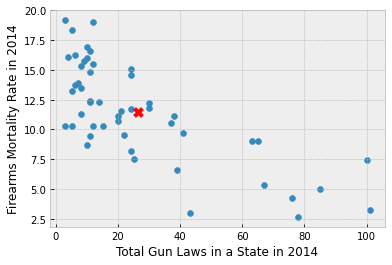

In [109]:
plt.scatter(x[:,0],x[:,1])
plt.scatter(np.average(x[:,0]),np.average(x[:,1]),
            color='red',
            marker='X',
           s=100)
plt.xlabel('Total Gun Laws in a State in 2014')
plt.ylabel('Firearms Mortality Rate in 2014');

Note that just calling average on $\mathbf{x}$ doesn't do what we want:

In [112]:
np.average(x)

18.959999999999997

But we can be more concise and get our desired result if we tell ```NumPy``` to average over the data in rows (axis=0):

In [113]:
np.average(x,axis=0)

array([26.48, 11.44])

In [114]:
np.mean(x,axis=0)

array([26.48, 11.44])

Similarly, the median of a set of vectors is the vector of the medians of the components:

In [115]:
np.median(x,axis=0)

array([14.5, 11.4])

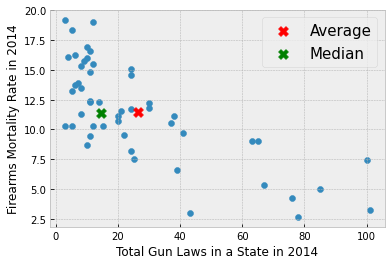

In [117]:
plt.scatter(df['Total Laws 2014'],df['RATE-2014'])
plt.xlabel('Total Gun Laws in a State in 2014')
plt.ylabel('Firearms Mortality Rate in 2014');

mean = np.mean(x,axis=0)
median = np.median(x,axis=0)
plt.scatter(mean[0],mean[1], color='red', marker='X', s=100, label='Average')
plt.scatter(median[0],median[1], color='green', marker='X', s=100, label='Median')
plt.legend(fontsize=15);

## Means of Random Vectors

<div class="alert alert-info">
  <strong>Means of Random Vectors</strong>
    
For a vector random variable $\mathbf{X}=[X_1, X_2]^T$, the **mean vector** is the vector of component means:

\begin{align} 
E[\mathbf{X}] & = E\bigl[\left[X_1, X_2\right]^T \bigr]\\ 
& = \bigl[E\left[X_1\right], E\left[X_2\right] \bigr]^T
\end{align}
    
</div>

## Higher-order Moments: Variances, Covariances, and Correlations

Recall that the variance of a random variable is the 2nd central moment:
$$
\operatorname{Var}(Y) = E \left[ \left(Y - \mu_Y\right)^2 \right]
$$

It is a measure of the "spread" of probability density away from the mean.

We can use ```NumPy``` to compute the variance of a data set.

* Remember that we should always use the **unbiased estimator** for the variance: $s^2_{n-1}=\frac{1}{n-1} \sum_{i=1}^{n} \left(y_i - \overline{y}\right)^2$

In [120]:
np.var(x[:,1],ddof=1) # ddof = delta degrees of freedom

17.220408163265308

In [121]:
np.var(x[:,0],ddof=1)

683.4383673469387

Once again, we need to specify which entries we want to compute the variance for:

In [122]:
np.var(x, ddof=1, axis=0)

array([683.43836735,  17.22040816])

In [123]:
np.var(x, ddof=1, axis=1) # what not to do

array([2.380500e+01, 1.312200e+02, 1.512500e+01, 1.568000e+01,
       4.287380e+03, 1.584200e+02, 3.200000e+03, 3.618050e+02,
       4.512500e+01, 2.964500e+01, 2.842580e+03, 3.362000e+01,
       1.568000e+03, 9.800000e-01, 1.531250e+02, 5.445000e+00,
       2.380500e+01, 2.450000e+01, 1.280000e+00, 1.458000e+03,
       4.782420e+03, 3.960500e+01, 5.248800e+02, 8.844500e+01,
       2.664500e+01, 7.320500e+01, 7.812500e+01, 7.220000e+00,
       8.450000e-01, 1.903445e+03, 1.800000e+01, 2.577620e+03,
       1.656200e+02, 1.445000e+00, 1.104500e+01, 2.244500e+01,
       7.564500e+01, 3.511250e+02, 8.000000e+02, 6.125000e+00,
       1.404500e+01, 3.960500e+01, 4.324500e+01, 8.450000e-01,
       2.664500e+01, 1.445000e+00, 4.898450e+02, 4.418000e+01,
       1.248200e+02, 5.202000e+01])

<div class="alert alert-info">
  <strong>Variance of Random Vectors</strong>
    
The variance of a vector random variable is defined as the vector of variances of the components:

$$ \operatorname{Var}\left(\mathbf{X} \right) = \bigl[ \operatorname{Var}\left[X_1\right], \operatorname{Var}\left[X_2\right], \ldots, \operatorname{Var}\left[X_n\right] \bigr]^T $$
    
</div>

More commonly, we measure not only the spread of each individual random variable in a vector but also the way that the probability of the different random variables are spread with respect to each other:

<div class="alert alert-info">
  <strong>Covariance</strong>

The **covariance** of two random variables $X$ and $Y$, denoted by $\text{cov}(X,Y)$, is defined by

$$\text{cov}(X,Y) = E\bigl[\left(X-E\left[X\right]\right) \left(Y-E\left[Y\right]\right)\bigr]$$
    
</div>

Note that 
$$ \operatorname{Var}(X)= \operatorname{Cov}(X,X) $$

* Roughly speaking, a positive or negative covariance indicates that the values of $X-E[X]$ and $Y-E[Y]$ obtained in a single experiment "tend" to have the same or opposite sign, respectively.

* Thus, the sign of the covariance provides an important *qualitative* indicator of the relationship between $X$ and $Y$.

Computing covariance for random variables requires understanding *joint probability distributions* -- this topic is outside the scope of this class.

However, we will compute the covariance when we are working with vectors of data

If $\{x_i\}$ and $\{y_i\}$ are sample data from some random variables $X$ and $Y$, then the unbiased (sample) covariance is 
$$
\frac{1}{n-1} \sum_{i=1}^{n} \left(x_i - \overline{x}\right)
\left(y_i - \overline{y}\right) 
$$

Fortunately (but somewhat inconsistently), ```NumPy``` uses the unbiased estimator for covariance by default.

* Let's check the variances of our gun-law data:

In [125]:
np.cov(x[:,0],ddof=1), np.cov(x[:,1],ddof=1)

(array(683.43836735), array(17.22040816))

In [126]:
np.cov(x[:,0]), np.cov(x[:,1])

(array(683.43836735), array(17.22040816))

* We can get all the variances and covariances of our data as:

In [133]:
x.shape

(50, 2)

In [130]:
np.cov(x.T)

array([[683.43836735, -80.59102041],
       [-80.59102041,  17.22040816]])

Note that if our vectors are not already stacked into an array, we can still compute the covariances:

In [135]:
np.cov(x[:,0],x[:,1])

array([[683.43836735, -80.59102041],
       [-80.59102041,  17.22040816]])

In [134]:
np.cov(df['Total Laws 2014'], df['RATE-2014'])

array([[683.43836735, -80.59102041],
       [-80.59102041,  17.22040816]])

This is called a **Covariance Matrix**. It is a table of the variances and covariances of the data in the following form 
\begin{align}
\mathbf{K_X} &= 
\begin{bmatrix}
\operatorname{Cov}(\mathbf{X}_1, \mathbf{X}_1) & \operatorname{Cov}(\mathbf{X}_1, \mathbf{X}_2)  \\
\operatorname{Cov}(\mathbf{X}_2, \mathbf{X}_1) & \operatorname{Cov}(\mathbf{X}_2, \mathbf{X}_2)  \\
\end{bmatrix} \\
&\\
&=
\begin{bmatrix}
\operatorname{Var}(\mathbf{X}_1) & \operatorname{Cov}(\mathbf{X}_1, \mathbf{X}_2)  \\
\operatorname{Cov}(\mathbf{X}_1, \mathbf{X}_2) & \operatorname{Var}(\mathbf{X}_2)  \\
\end{bmatrix} 
\end{align}

Note that the covariance is negative for these two data samples. This generally implies that when one goes up, the other goes down. Let's look at the data again to see whether this holds:

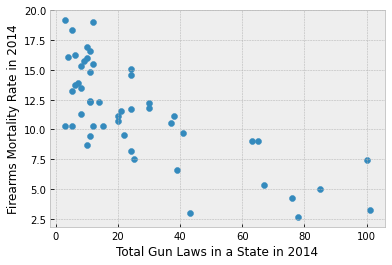

In [136]:
plt.scatter(df['Total Laws 2014'],df['RATE-2014'])
plt.xlabel('Total Gun Laws in a State in 2014')
plt.ylabel('Firearms Mortality Rate in 2014');

### **<font color="blue">Another Example</font>**

"The **Behavioral Risk Factor Surveillance System (BRFSS)** is the nation's premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services.": https://www.cdc.gov/brfss/index.html

The BRFSS contains 450015 records, with over 350 variables. It takes a LONG time to load and work with, so we have pulled out 2 variables and sampled 5000 records for us to work with

The data we will use is

* **HEIGHT**: a new computed variable as the height in inches

* **WEIGHT2**: The reported weight in pounds

We dropped those entries that did not have valid values or were reported in metric units (a small percentage of the total)

The resulting dataframe is stored in the pickle file ```brfss17.pickle```.

In [137]:
import pickle

file=open('brfss17.pickle','rb')
df2=pickle.load(file)
file.close()

In [138]:
df2

,HEIGHT,WEIGHT2
435546,64.0,180.0
191440,64.0,160.0
236807,64.0,210.0
2422,64.0,155.0
166257,73.0,220.0
...,...,...
378399,63.0,194.0
327432,63.0,150.0
297029,61.0,108.0
384245,61.0,200.0


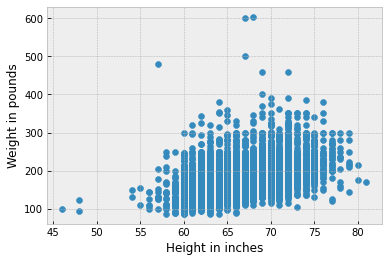

In [139]:
plt.scatter(df2['HEIGHT'],df2['WEIGHT2'])
plt.xlabel('Height in inches')
plt.ylabel('Weight in pounds');

What should the sign of the covariance be?


Positive!

In [140]:
np.cov(df2['HEIGHT'],df2['WEIGHT2'])

array([[  17.7146933 ,   89.38995679],
       [  89.38995679, 2131.30006401]])

Finally, let's look at what happens for some independent data:

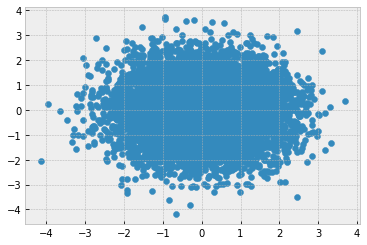

In [147]:
Y=stats.norm() # G(0,1)
Z=stats.norm() #G(0,1)
y=Y.rvs(size=10_000)
z=Z.rvs(size=10_000)
plt.scatter(y,z);

In [148]:
np.cov(y,z)

array([[1.01447852, 0.0037399 ],
       [0.0037399 , 1.02198324]])

Note the very small sample covariance. When random variables are independent, their covariance is zero.

Let $\{x_i\}$ refer to the first feature (or dimension) and $\{y_i\}$ refer to the second feature (or dimension). Then:

* If $y_i$ generally increases with $x_i$ (and vice versa), then $\operatorname{Cov}(\mathbf{x},\mathbf{y}) >0$

* If $y_i$ generally decreases with $x_i$ (and vice versa), then  $\operatorname{Cov}(\mathbf{x},\mathbf{y}) <0$

* If $x_i$ and $y_i$ are independent, then $\operatorname{Cov}(\mathbf{x},\mathbf{y}) =0$

So, covariance is useful in giving us some idea of how two features co-vary.

However, it does not tell us two important things:
1. If we want to draw through the data showing the linear dependence, what is the slope of that line? I.e., what is the general (linear) relation between the features?
2. If we drew such a line, it does not tell us whether the data is very close to that line (meaning that we can compute one feature almost exactly from an observation of the other feature) or if the data is scattered far from that line (meaning that if we know one feature, the other feature is still pretty random)

We can overcome both of these problems. We start with an observation:

Suppose $X$ and $Y$ are random variables with $\operatorname{Cov}(X,Y) \neq 0$.

* What is $\operatorname{Cov}(aX,bY)$?

By linearity, $E[aX] = aE[X]$ and $E[bY]=bE[Y]$. 

Then 
\begin{align*}
\operatorname{Cov}(aX,bY) &= E \biggl[ \bigl( aX - E\left[aX\right] \bigr) \bigl( bY - E\left[bY\right] \bigr) \biggr]\\
 &= E \biggl[ a \bigl( X - E\left[X\right] \bigr) b \bigl( Y - E\left[Y\right] \bigr) \biggr] \\
 &=ab E \biggl[  \bigl( X - E\left[X\right] \bigr)  \bigl( Y - E\left[Y\right] \bigr) \biggr]\\
 &=ab \operatorname{Cov}(X,Y)
\end{align*}

But if $a=b$, the relationship between the data (in terms of the slope) is really unchanged:

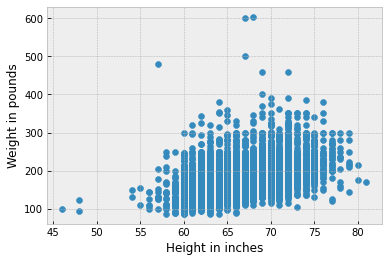

In [149]:
plt.scatter(df2['HEIGHT'], df2['WEIGHT2'])
plt.xlabel('Height in inches')
plt.ylabel('Weight in pounds');

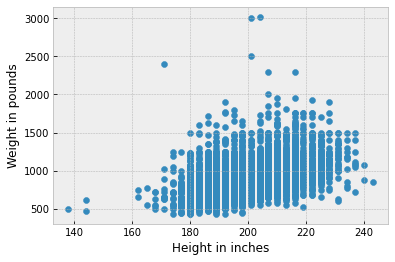

In [150]:
plt.scatter(3*df2['HEIGHT'], 5*df2['WEIGHT2'])
plt.xlabel('Height in inches')
plt.ylabel('Weight in pounds');

Let's study what values $\operatorname{cov}(\mathbf{x},\mathbf{y})$ can take on. 

Recall that the inner product of some vector $\mathbf{a}$ with itself
$$ \mathbf{a}^T \mathbf{a} = a_{1}^{2} + a_{2}^{2} + \cdots +  a_{n}^{2} $$

computes the sum of the squares of the elements. This is the square of the **length** of the vector.

We can also denote the length of a vector $\mathbf{a}$ as $\|\mathbf{a}\|$, which is also read **norm of a**, and
$$ \text{length of }\mathbf{a} = \| \mathbf{a} \|  = \sqrt{\mathbf{a}^T\mathbf{a}} $$

## Cauchy-Schwarz Inequality

<div class="alert alert-info">
  <strong>Cauchy-Schwarz Inequality</strong>

The **Cauchy-Schwarz Inequality** provides a bound on the maximum absolute value of an inner product in terms of the norms of the vectors:
    
$$\left| \langle \mathbf{a}, \mathbf{b} \rangle \right| \le \left\|\mathbf{a} \right\| \left\| \mathbf{b}\right\|$$
    
with equality if and only if $\mathbf{a}= c\mathbf{b}$ for some constant $c$. 
    
Note that $ \langle \mathbf{a}, \mathbf{b} \rangle = \mathbf{a}^T\mathbf{b}$ is the inner product of $\mathbf{a}$ with $\mathbf{b}$.

*(See Boyd book, section 3.4, for proof)*
</div>
    
Here, I purposefully used the general inner product notation $\langle \rangle$ because the Cauchy-Schwarz Inequality applies to all inner products, not just those involving vectors (e.g. inner product of matrices).

Noting our computation of covariance using inner product above, we can get

\begin{align*}
\left|\operatorname{cov}(\mathbf{x}, \mathbf{y})  \right|
&= \big\langle \left(\mathbf{x} - \boldsymbol \mu_x \right), 
    \left(\mathbf{y} - \boldsymbol \mu_y \right) \big\rangle \\
&\le \left\| \mathbf{x} - \boldsymbol \mu_x  \right\|
    \left\| \mathbf{y} - \boldsymbol \mu_y  \right\| \\
&= \sqrt{\big\langle \left(\mathbf{x} - \boldsymbol \mu_x \right),
    \left(\mathbf{x} - \boldsymbol \mu_x \right) \big\rangle}
    \sqrt{\big\langle \left(\mathbf{y} - \boldsymbol \mu_y \right),
    \left(\mathbf{y} - \boldsymbol \mu_y \right) \big\rangle} \\
&= \sqrt{\operatorname{cov}(\mathbf{x}, \mathbf{x}) } \sqrt{\operatorname{cov}(\mathbf{y}, \mathbf{y}) }\\
&= \sigma_x \sigma_y
\end{align*}

So 
$$\left|\operatorname{cov}(\mathbf{x}, \mathbf{y})  \right| \leq \sigma_x \sigma_y$$

### Observations:

1. The covariance is bounded by (and depends on) the standard deviations of the data

2. Equality is obtained in the bound above if and only if $\mathbf{x} = c \mathbf{y}$ for some $c$. The maximum possible covariance is if the features are linearly dependent; knowing one feature completely determines the other feature

We can use the bound to get a dependence measure that does not depend on the standard deviations of the data:

\begin{align*}
\left|\operatorname{cov}(\mathbf{x}, \mathbf{y})\right| &\leq\sigma_x \sigma_y\\
&\\
\Rightarrow \frac{\left|\operatorname{cov}(\mathbf{x}, \mathbf{y})\right|}{\sigma_x \sigma_y} &\le 1
\end{align*}

with equality iff $\mathbf{x}=c\mathbf{y}$.

# (Pearson's) Correlation Coefficient, $r$

<div class="alert alert-info">
  <strong>Pearson's Correlation Coefficient</strong>

For random variables $X$ and $Y$, the **Pearson's correlation coefficient** (or simply the **correlation coefficient**) is

\begin{align*}
\rho_{XY} = \frac{\operatorname{cov}(X,Y)}{\sqrt{\text{var}(X)}\sqrt{\text{var}(Y)}} = \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y}
\end{align*}

For vectors of feature data $\mathbf{x}$ and $\mathbf{y}$ (samples), the **(Pearson's) correlation coefficient** is 

\begin{align*}
r_{xy} = \frac{\hat{\operatorname{cov}}(\mathbf{x},\mathbf{y})}{\hat{\sigma}_x \hat{\sigma}_y}
\end{align*}

where $\hat{\operatorname{cov}}(\mathbf{x},\mathbf{y})$ is the sample covariance and $\hat{\sigma}_x$ and $\hat{\sigma}_y$ are the square-roots of the corresponding sample variances.    
</div>

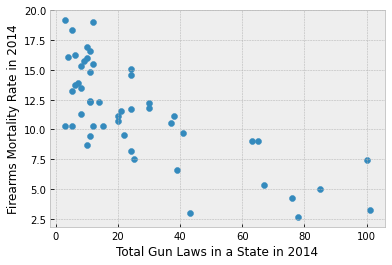

In [151]:
plt.scatter(df['Total Laws 2014'],df['RATE-2014'])
plt.xlabel('Total Gun Laws in a State in 2014')
plt.ylabel('Firearms Mortality Rate in 2014');

In [152]:
x = df[['Total Laws 2014','RATE-2014']].to_numpy()

x.shape # NxD

(50, 2)

In [153]:
x_mean = np.mean(x,axis=0) #mean is a 2x1 vector

x_median = np.median(x,axis=0) # median is also 2x1 vector

x_mean.shape, x_median.shape

((2,), (2,))

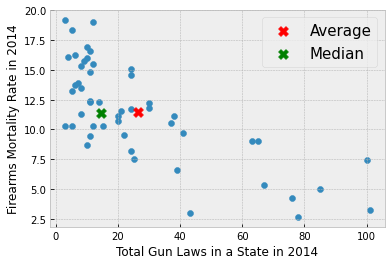

In [154]:
plt.scatter(df['Total Laws 2014'],df['RATE-2014'])
plt.xlabel('Total Gun Laws in a State in 2014')
plt.ylabel('Firearms Mortality Rate in 2014')
plt.scatter(x_mean[0], x_mean[1], color='red', marker='X', s=100, label='Average')
plt.scatter(x_median[0], x_median[1], color='green', marker='X', s=100, label='Median')
plt.legend(fontsize=15);

In [155]:
np.cov(x.T) 
# np.cov expects the matrix to be of size DxN, D is dimensionality or no. of RVs


array([[683.43836735, -80.59102041],
       [-80.59102041,  17.22040816]])

In [158]:
np.cov(x.T)/(np.std(x[:,0],ddof=1)*(np.std(x[:,1],ddof=1)))

array([[ 6.29981734, -0.74287417],
       [-0.74287417,  0.15873476]])

In [159]:
np.cov(3*x.T)/(np.std(3*x[:,0],ddof=1)*(np.std(3*x[:,1],ddof=1)))

array([[ 6.29981734, -0.74287417],
       [-0.74287417,  0.15873476]])

___

## Correlation Examples

![Correlation Examples](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)

Looking at these examples, correlation gives a measure of:
* how closely the data fits a straight line
* how much an observation of one data feature can be used to predict the other data feature
* the correlation coefficient is only able to characterize **linear relationships** only

___